In [16]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

In [17]:
#load data set
df = pd.read_csv("datapro.csv")
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [18]:
df.describe()

,Unnamed: 0,open,high,low,close,volume,marketCap
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


In [20]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   72946 non-null  int64         
 1   open         72946 non-null  float64       
 2   high         72946 non-null  float64       
 3   low          72946 non-null  float64       
 4   close        72946 non-null  float64       
 5   volume       72946 non-null  float64       
 6   marketCap    72946 non-null  float64       
 7   timestamp    72946 non-null  object        
 8   crypto_name  72946 non-null  object        
 9   date         72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 5.6+ MB


In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Unnamed: 0   72946 non-null  int64              
 1   open         72946 non-null  float64            
 2   high         72946 non-null  float64            
 3   low          72946 non-null  float64            
 4   close        72946 non-null  float64            
 5   volume       72946 non-null  float64            
 6   marketCap    72946 non-null  float64            
 7   timestamp    72946 non-null  datetime64[ns, UTC]
 8   crypto_name  72946 non-null  object             
 9   date         72946 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 5.6+ MB


In [22]:
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['year'] = df['timestamp'].dt.year

df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,day_of_week,month,day,year
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05 23:59:59.999000+00:00,Bitcoin,2013-05-05,6,5,5,2013
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05 23:59:59.999000+00:00,Litecoin,2013-05-05,6,5,5,2013
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06 23:59:59.999000+00:00,Bitcoin,2013-05-06,0,5,6,2013
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06 23:59:59.999000+00:00,Litecoin,2013-05-06,0,5,6,2013
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07 23:59:59.999000+00:00,Bitcoin,2013-05-07,1,5,7,2013


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Unnamed: 0   72946 non-null  int64              
 1   open         72946 non-null  float64            
 2   high         72946 non-null  float64            
 3   low          72946 non-null  float64            
 4   close        72946 non-null  float64            
 5   volume       72946 non-null  float64            
 6   marketCap    72946 non-null  float64            
 7   timestamp    72946 non-null  datetime64[ns, UTC]
 8   crypto_name  72946 non-null  object             
 9   date         72946 non-null  datetime64[ns]     
 10  day_of_week  72946 non-null  int32              
 11  month        72946 non-null  int32              
 12  day          72946 non-null  int32              
 13  year         72946 non-null  int32              
dtypes: datetime64[ns, UTC]

In [24]:
df.isnull().sum()

Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
day_of_week    0
month          0
day            0
year           0
dtype: int64

In [25]:
df.drop(['timestamp','Unnamed: 0', 'date'], axis=1, inplace=True, errors='ignore')
df.head()

,open,high,low,close,volume,marketCap,crypto_name,day_of_week,month,day,year
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,Bitcoin,6,5,5,2013
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,Litecoin,6,5,5,2013
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,Bitcoin,0,5,6,2013
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,Litecoin,0,5,6,2013
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,Bitcoin,1,5,7,2013


<Axes: >

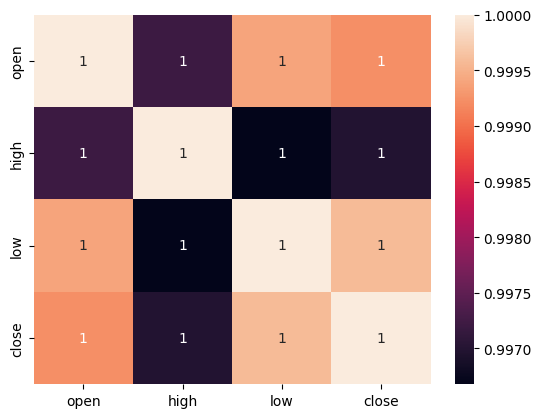

In [26]:
sns.heatmap(df[['open', 'high', 'low', 'close']].corr(), annot=True)

In [27]:
categorical_cols = ['crypto_name']
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

df.head()

,open,high,low,close,volume,marketCap,crypto_name,day_of_week,month,day,year
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,8,6,5,5,2013
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,30,6,5,5,2013
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,8,0,5,6,2013
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,30,0,5,6,2013
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,8,1,5,7,2013


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         72946 non-null  float64
 1   high         72946 non-null  float64
 2   low          72946 non-null  float64
 3   close        72946 non-null  float64
 4   volume       72946 non-null  float64
 5   marketCap    72946 non-null  float64
 6   crypto_name  72946 non-null  int64  
 7   day_of_week  72946 non-null  int32  
 8   month        72946 non-null  int32  
 9   day          72946 non-null  int32  
 10  year         72946 non-null  int32  
dtypes: float64(6), int32(4), int64(1)
memory usage: 5.0 MB


In [29]:
X = df.drop(columns="close", axis=1)
y = df['close']

In [30]:
#spliting of the data into train and test part
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
#initialize the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred = model.predict(X_test)

In [33]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 20.543737717260523
R2 Score: 0.9993536782166593


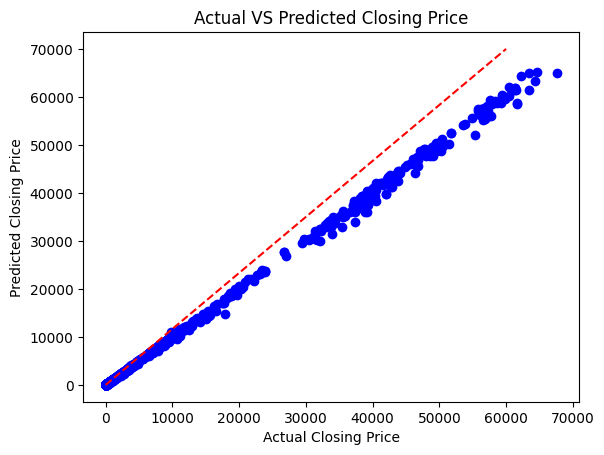

In [34]:
#visualization
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual VS Predicted Closing Price")
plt.plot([0, 60000], [0, 70000], '--r')

In [35]:
#initialize decision tree model
d_model = DecisionTreeRegressor()
d_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [36]:
#decision tree predict
d_y_pred = d_model.predict(X_test)

In [37]:
#decision tree evaluation
print(f"Mean Absolute Error: {mean_absolute_error(y_test, d_y_pred)}")
print(f"R2 Score: {r2_score(y_test, d_y_pred)}")

Mean Absolute Error: 14.557724950361413
R2 Score: 0.9979497605191843


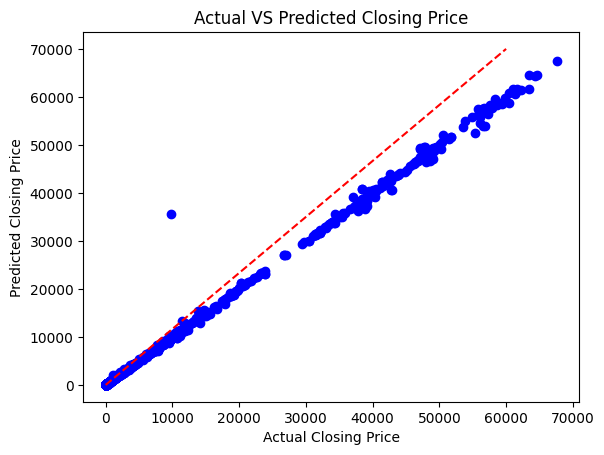

In [38]:
plt.scatter(y_test, d_y_pred, color="blue")
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual VS Predicted Closing Price")
plt.plot([0, 60000], [0, 70000], '--r')

In [39]:
#initialize random forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
#random forest predict 
rf_y_pred = rf_model.predict(X_test)

In [41]:
#random forest evaluation
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rf_y_pred)}")
print(f"R2 Score: {r2_score(y_test, rf_y_pred)}")

Mean Absolute Error: 12.225258728514493
R2 Score: 0.998551363367415


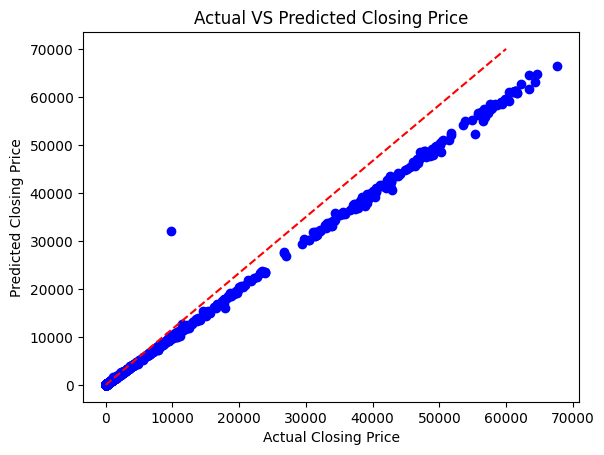

In [42]:
plt.scatter(y_test, rf_y_pred, color="blue")
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual VS Predicted Closing Price")
plt.plot([0, 60000], [0, 70000], '--r')

In [43]:
#initialize gradient boosting regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [44]:
#gradient boosting predict
gb_y_pred = gb_model.predict(X_test)

In [45]:
#gradiant boosting evaluation
print(f"Mean Absolute Error: {mean_absolute_error(y_test, gb_y_pred)}")
print(f"R2 Score: {r2_score(y_test, gb_y_pred)}")

Mean Absolute Error: 17.39260492836644
R2 Score: 0.999081911085525


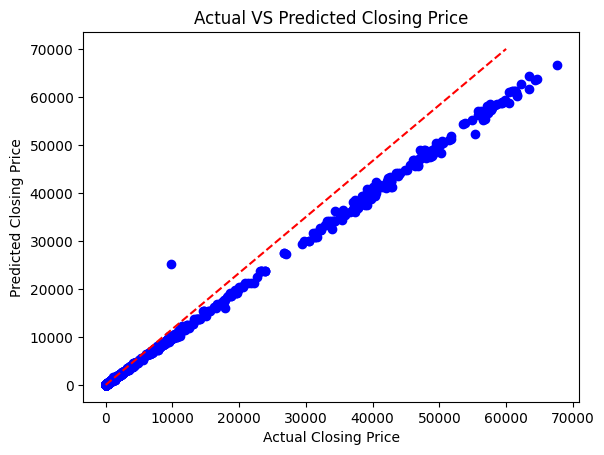

In [48]:
plt.scatter(y_test, gb_y_pred, color="blue")
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual VS Predicted Closing Price")
plt.plot([0, 60000], [0, 70000], '--r')

In [49]:
df_results = pd.DataFrame({'y_test': y_test, 'gb_y_pred': gb_y_pred})

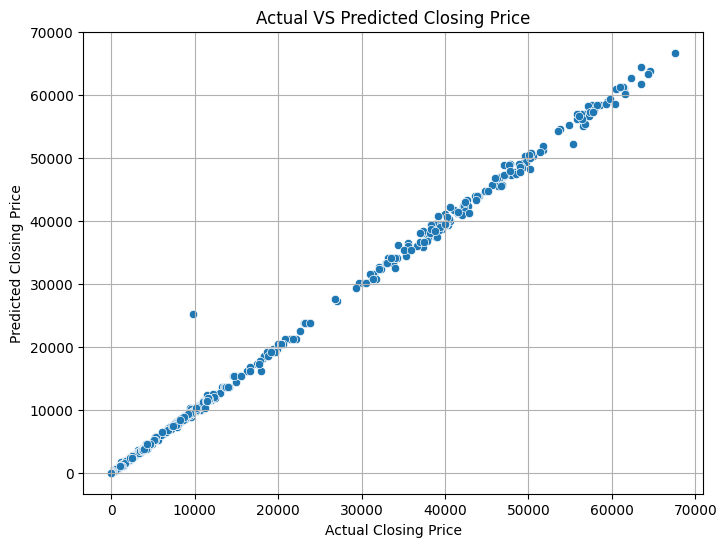

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_results, x='y_test', y='gb_y_pred')
plt.title('Actual VS Predicted Closing Price')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.grid(True)
plt.show()

In [51]:
#model prediction for linearRegression
Mean_Absolute_Error: 20.542904707283555
R2_score: 0.9993537423716791

#decision tree regressor model
Mean_Absolute_error: 14.55635788013525
R2_Score: 0.9979624705077967

#random forest regressor model
Mean_absolute_Error: 12.220451286691791
R2_Score: 0.998406524142747

# gradient boosting regressor model
mean_Absolute_Error: 17.395657301074845
r2_Score: 0.9990524154128027

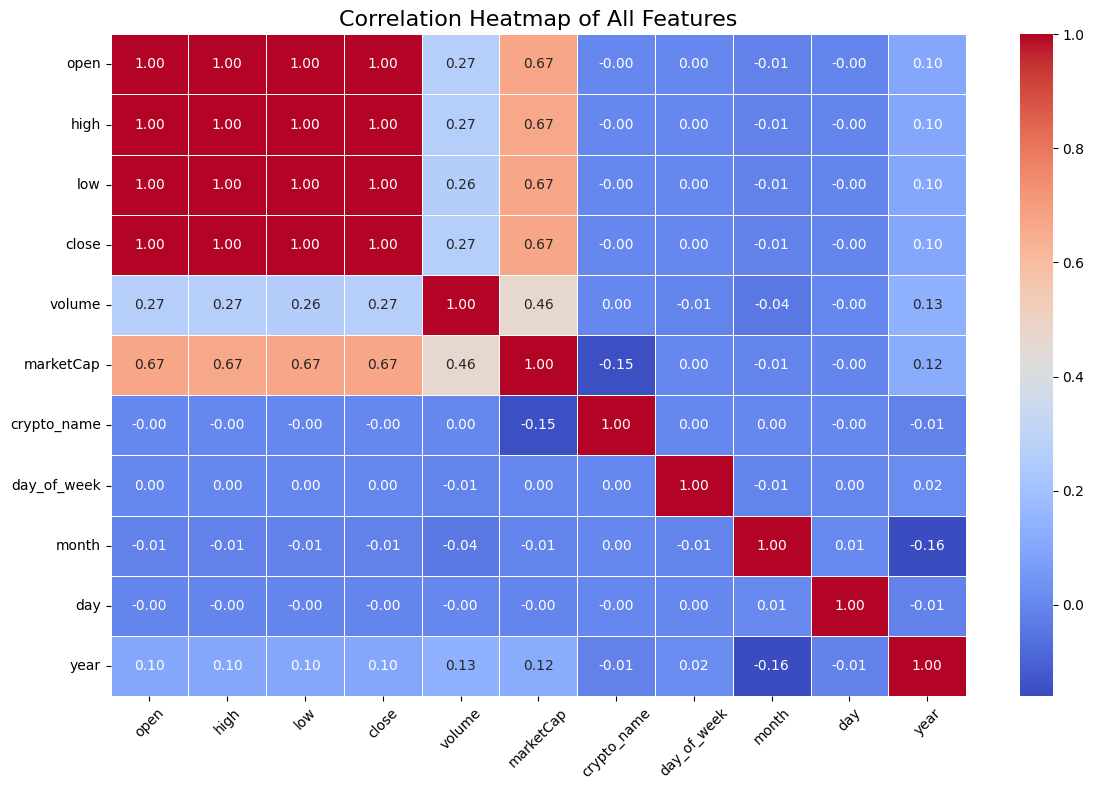

In [52]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

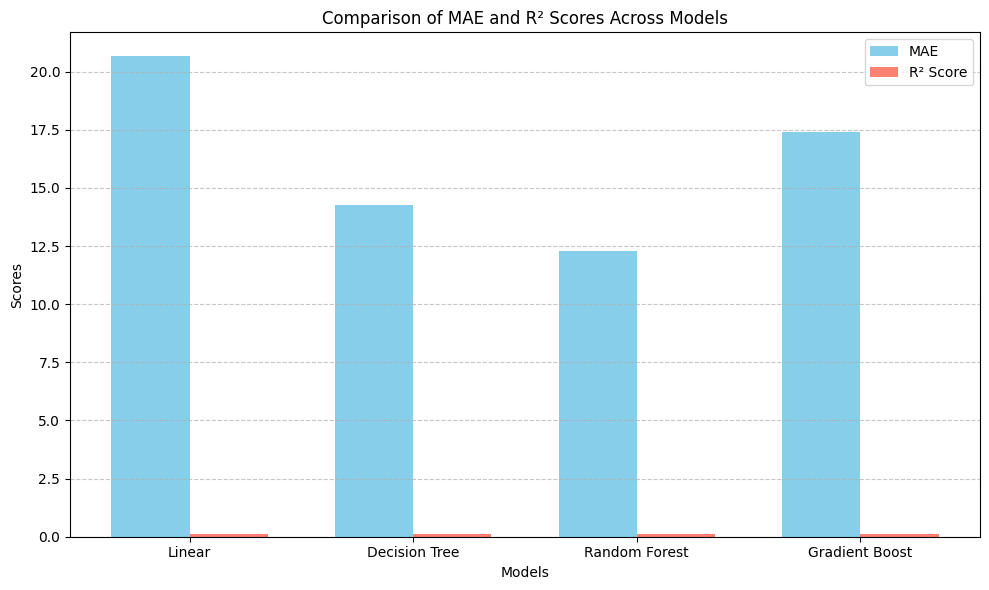

In [53]:
models = ['Linear', 'Decision Tree', 'Random Forest', 'Gradient Boost']
mae_scores = [20.66, 14.28, 12.30, 17.42]
r2_scores = [0.10, 0.10, 0.10, 0.10]

x = np.arange(len(models))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, mae_scores, width=bar_width, label='MAE', color='skyblue')
plt.bar(x + bar_width/2, r2_scores, width=bar_width, label='R² Score', color='salmon')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of MAE and R² Scores Across Models')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
plt.figure(figsize=(14,7))
for name in df['crypto_name'].unique():
    crypto_df = df[df['crypto_name'] == name]
    plt.plot(crypto_df['date'],crypto_df['close'], label=name)

plt.title('Cryptocurrency Closing Price OVer Time')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend(title='Cryptocurrency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


KeyError: 'date'

ValueError: Could not interpret value `date` for `x`. An entry with this name does not appear in `data`.

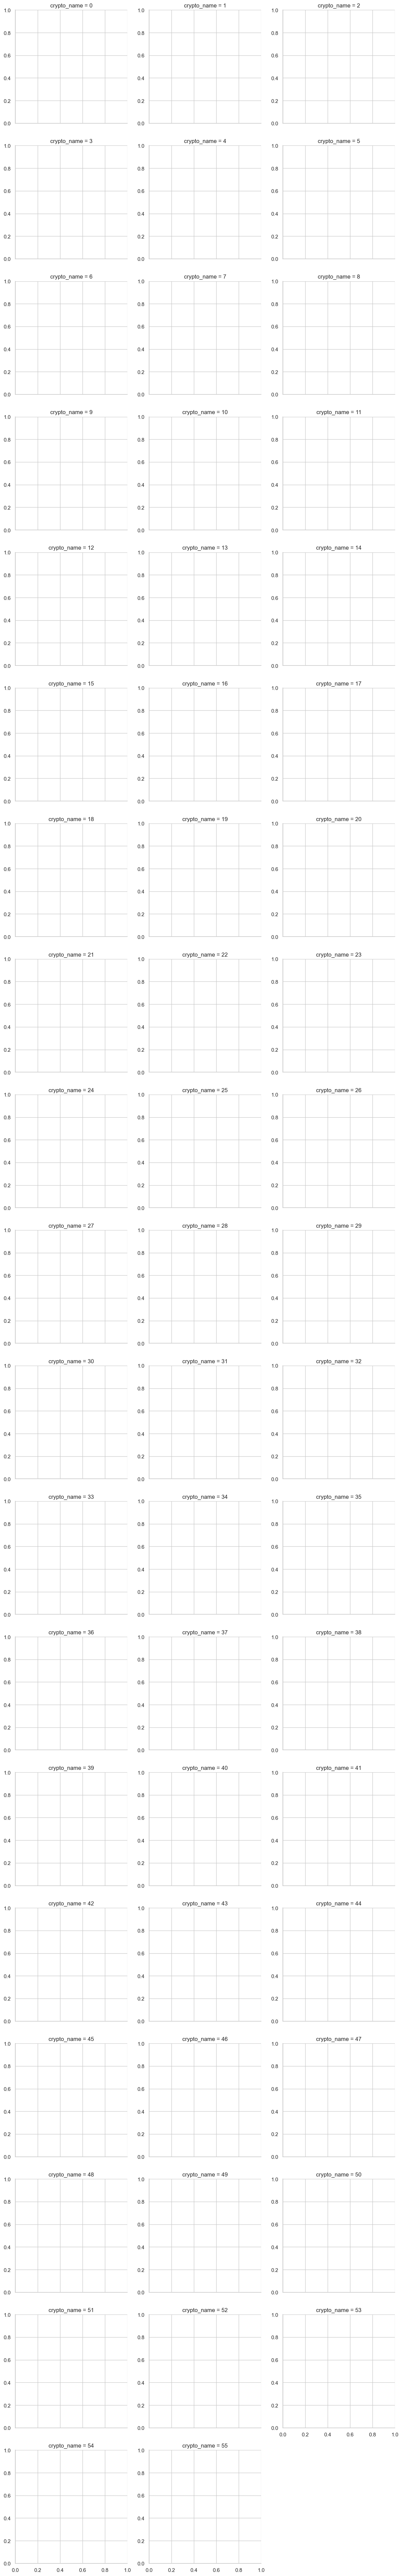

In [58]:
sns.set(style='whitegrid')
g = sns.FacetGrid(df, col='crypto_name', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='date', y='close')
g.set_titles('{col_name}')
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90, labelsize=8)
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price (USD)')

    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
g.tight_layout()
plt.show()

In [57]:
print(df.columns.tolist())

['open', 'high', 'low', 'close', 'volume', 'marketCap', 'crypto_name', 'day_of_week', 'month', 'day', 'year']
